# Univariate Energy Signature

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv('my_data.csv',sep=',',decimal='.',index_col=0)

In [3]:
df.index=pd.to_datetime(df.index,unit='s')

In [4]:
df.index

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:10:00',
               '2017-01-01 00:20:00', '2017-01-01 00:30:00',
               '2017-01-01 00:40:00', '2017-01-01 00:50:00',
               '2017-01-01 01:00:00', '2017-01-01 01:10:00',
               '2017-01-01 01:20:00', '2017-01-01 01:30:00',
               ...
               '2017-12-31 22:20:00', '2017-12-31 22:30:00',
               '2017-12-31 22:40:00', '2017-12-31 22:50:00',
               '2017-12-31 23:00:00', '2017-12-31 23:10:00',
               '2017-12-31 23:20:00', '2017-12-31 23:30:00',
               '2017-12-31 23:40:00', '2017-12-31 23:50:00'],
              dtype='datetime64[ns]', name='Date_time', length=52560, freq=None)

In [5]:
df.columns

Index(['Heat', 'Cool', 'Elec', 'T_ex', 'T_in', 'Solar'], dtype='object')

In [6]:
df['deltaT']=df.T_in.astype(float)-df.T_ex.astype(float)
df['T_in']=df.T_in.astype(float)
df['T_ex']=df.T_ex.astype(float)
df['Heat']=df.Heat.astype(float)
df['Cool']=df.Cool.astype(float)
df['Solar']=df.Solar.astype(float)

# 10 minutes

Extract the cooling and heating dataframes and drop null values

In [7]:
cool_d = df.where(df['Cool']!=0.0).dropna()
heat_d = df.where(df['Heat']!=0.0).dropna()

Fit the regression models

In [8]:
model_h = sm.OLS(heat_d.Heat,sm.add_constant(heat_d.deltaT))
model_c = sm.OLS(cool_d.Cool,sm.add_constant(cool_d.deltaT))

In [9]:
results_h = model_h.fit()
results_c = model_c.fit()

Plot the results

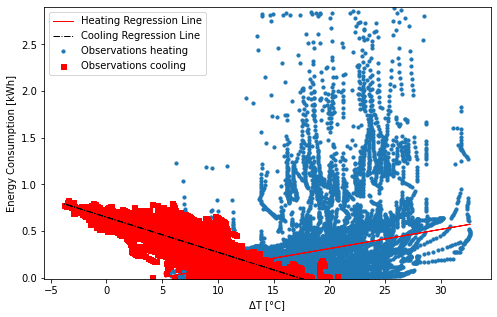

In [10]:
fig = plt.figure(figsize=(8,5))
plt.plot(heat_d.deltaT,results_h.predict(),'r', linewidth=1, label='Heating Regression Line')
plt.plot(cool_d.deltaT,results_c.predict(),'k',linestyle='-.', linewidth=1, label='Cooling Regression Line')
plt.scatter(heat_d.deltaT,heat_d.Heat, s=10, label='Observations heating')
plt.scatter(cool_d.deltaT,cool_d.Cool, s=25, color='r',marker='s', label='Observations cooling')
plt.xlabel('\u0394T [\u00B0C]')
plt.ylabel('Energy Consumption [kWh]')
plt.ylim(-0.01,2.9)
plt.legend()
plt.show()

Compute Root Mean Square Error

In [11]:
rmse_c = mean_squared_error(cool_d.Cool.values, results_c.predict(), squared=False)
print('The RMSE for 10 minutes of resolution for Cooling Consumptions is: '+str(rmse_c)+' kWh')
results_c.summary()

The RMSE for 10 minutes of resolution for Cooling Consumptions is: 0.10472903758520505 kWh


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cool   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                 1.726e+04
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        09:50:11   Log-Likelihood:                 6413.1
No. Observations:                7658   AIC:                        -1.282e+04
Df Residuals:                    7656   BIC:                        -1.281e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6500      0.003    253.024      0.000       0.645       0.655
deltaT        -0.0376      0.000   -131.379      0.000      -0.038      -0.037
==============================================================================
Omnibus:                      163.948   Durbin-Watson:                   0.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.235
Skew:                           0.166   Prob(JB):                     1.28e-64
Kurtosis:                       3.901   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
rmse_h = mean_squared_error(heat_d.Heat.values, results_h.predict(), squared=False)
print('The RMSE for 10 minutes of resolution for Heating Consumptions is: '+str(rmse_h)+' kWh')
results_h.summary()

The RMSE for 10 minutes of resolution for Heating Consumptions is: 0.3717859074868841 kWh


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Heat   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          2.70e-246
Time:                        09:50:11   Log-Likelihood:                -7252.1
No. Observations:               16885   AIC:                         1.451e+04
Df Residuals:                   16883   BIC:                         1.452e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0983      0.012     -8.503      0.000      -0.121      -0.076
deltaT         0.0206      0.001     34.083      0.000       0.019       0.022
==============================================================================
Omnibus:                    10160.286   Durbin-Watson:                   0.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           104929.625
Skew:                           2.786   Prob(JB):                         0.00
Kurtosis:                      13.868   Cond. No.                         77.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Hourly

Resample the dataset hourly

In [13]:
df=df.resample('H').mean()
df=df.dropna()

In [14]:
df.index

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00',
               '2017-01-01 04:00:00', '2017-01-01 05:00:00',
               '2017-01-01 06:00:00', '2017-01-01 07:00:00',
               '2017-01-01 08:00:00', '2017-01-01 09:00:00',
               ...
               '2017-12-31 14:00:00', '2017-12-31 15:00:00',
               '2017-12-31 16:00:00', '2017-12-31 17:00:00',
               '2017-12-31 18:00:00', '2017-12-31 19:00:00',
               '2017-12-31 20:00:00', '2017-12-31 21:00:00',
               '2017-12-31 22:00:00', '2017-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Date_time', length=8760, freq='H')

Extract the cooling and heating dataframes and drop null values

In [15]:
cool_d = df.where(df['Cool']!=0.0).dropna()
heat_d = df.where(df['Heat']!=0.0).dropna()

Fit the regression models

In [16]:
model_h = sm.OLS(heat_d.Heat,sm.add_constant(heat_d.deltaT))
model_c = sm.OLS(cool_d.Cool,sm.add_constant(cool_d.deltaT))

In [17]:
results_h = model_h.fit()
results_c = model_c.fit()

Plot the results

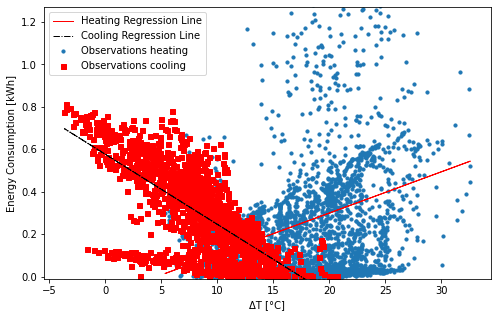

In [18]:
fig = plt.figure(figsize=(8,5))
plt.plot(heat_d.deltaT,results_h.predict(),'r', linewidth=1, label='Heating Regression Line')
plt.plot(cool_d.deltaT,results_c.predict(),'k', linestyle='-.', linewidth=1, label='Cooling Regression Line')
plt.scatter(heat_d.deltaT,heat_d.Heat, s=10, label='Observations heating')
plt.scatter(cool_d.deltaT,cool_d.Cool, s=25, color='r', marker='s',label='Observations cooling')
plt.xlabel('\u0394T [\u00B0C]')
plt.ylabel('Energy Consumption [kWh]')
plt.ylim(-0.01,1.27)
plt.legend()
plt.show()

Compute RMSE

In [19]:
rmse_c = mean_squared_error(cool_d.Cool.values, results_c.predict(), squared=False)
print('The RMSE for hourly resolution for Cooling Consumptions is: '+str(rmse_c)+' kWh')
results_c.summary()

The RMSE for hourly resolution for Cooling Consumptions is: 0.14453922362917856 kWh


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cool   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     1344.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          5.52e-208
Time:                        09:50:13   Log-Likelihood:                 737.35
No. Observations:                1431   AIC:                            -1471.
Df Residuals:                    1429   BIC:                            -1460.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5771      0.008     70.842      0.000       0.561       0.593
deltaT        -0.0330      0.001    -36.663      0.000      -0.035      -0.031
==============================================================================
Omnibus:                      140.739   Durbin-Watson:                   0.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.181
Skew:                          -0.733   Prob(JB):                     6.23e-46
Kurtosis:                       4.159   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
rmse_h = mean_squared_error(heat_d.Heat.values, results_h.predict(), squared=False)
print('The RMSE for hourly resolution for Heating Consumptions is: '+str(rmse_h)+' kWh')
results_h.summary()

The RMSE for hourly resolution for Heating Consumptions is: 0.3483083870329946 kWh


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Heat   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     203.3
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           1.17e-44
Time:                        09:50:13   Log-Likelihood:                -1077.9
No. Observations:                2959   AIC:                             2160.
Df Residuals:                    2957   BIC:                             2172.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0890      0.026     -3.430      0.001      -0.140      -0.038
deltaT         0.0194      0.001     14.258      0.000       0.017       0.022
==============================================================================
Omnibus:                     1557.994   Durbin-Watson:                   0.483
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10696.003
Skew:                           2.458   Prob(JB):                         0.00
Kurtosis:                      10.911   Cond. No.                         77.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Daily

In [21]:
df=df.resample('D').mean()
df=df.dropna()

Extract the cooling and heating dataframes and drop null values

In [22]:
cool_d = df.where(df['Cool']!=0.0).dropna()
heat_d = df.where(df['Heat']!=0.0).dropna()

Fit the regression models

In [23]:
model_h = sm.OLS(heat_d.Heat,sm.add_constant(heat_d.deltaT))
model_c = sm.OLS(cool_d.Cool,sm.add_constant(cool_d.deltaT))

In [24]:
results_h = model_h.fit()
results_c = model_c.fit()

Plot the results

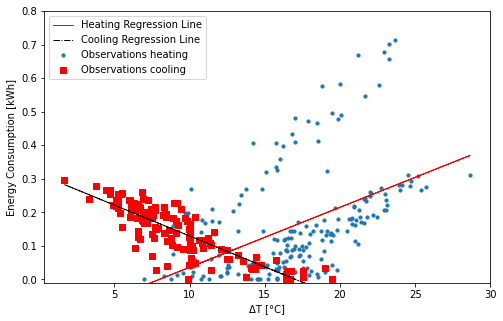

In [25]:
fig = plt.figure(figsize=(8,5))
plt.plot(heat_d.deltaT,results_h.predict(),'r', linewidth=1, label='Heating Regression Line')
plt.plot(cool_d.deltaT,results_c.predict(),'k', linestyle='-.',linewidth=1, label='Cooling Regression Line')
plt.scatter(heat_d.deltaT,heat_d.Heat, s=10, label='Observations heating')
plt.scatter(cool_d.deltaT,cool_d.Cool, s=30, color='r',marker='s', label='Observations cooling')
plt.xlabel('\u0394T [\u00B0C]')
plt.ylabel('Energy Consumption [kWh]')
plt.ylim(-0.01,0.8)
plt.legend(loc='upper left')
plt.show()

In [26]:
rmse_c = mean_squared_error(cool_d.Cool.values, results_c.predict(), squared=False)
print('The RMSE for dayly resolution for Cooling Consumptions is: '+str(rmse_c)+' kWh')
results_c.summary()

The RMSE for dayly resolution for Cooling Consumptions is: 0.04175215318584173 kWh


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cool   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     297.2
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           6.01e-35
Time:                        09:50:13   Log-Likelihood:                 224.90
No. Observations:                 128   AIC:                            -445.8
Df Residuals:                     126   BIC:                            -440.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3137      0.010     30.118      0.000       0.293       0.334
deltaT        -0.0184      0.001    -17.239      0.000      -0.021      -0.016
==============================================================================
Omnibus:                       20.498   Durbin-Watson:                   1.410
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.893
Skew:                          -0.912   Prob(JB):                     2.38e-06
Kurtosis:                       4.236   Cond. No.                         27.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
rmse_h = mean_squared_error(heat_d.Heat.values, results_h.predict(), squared=False)
print('The RMSE for dayly resolution for Heating Consumptions is: '+str(rmse_h)+' kWh')
results_h.summary()

The RMSE for dayly resolution for Heating Consumptions is: 0.13471247136271716 kWh


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Heat   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     64.85
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           6.29e-14
Time:                        09:50:14   Log-Likelihood:                 122.41
No. Observations:                 209   AIC:                            -240.8
Df Residuals:                     207   BIC:                            -234.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1428      0.039     -3.696      0.000      -0.219      -0.067
deltaT         0.0179      0.002      8.053      0.000       0.014       0.022
==============================================================================
Omnibus:                       56.578   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.711
Skew:                           1.469   Prob(JB):                     1.65e-21
Kurtosis:                       4.536   Cond. No.                         72.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Weekly

In [28]:
df=df.resample('W').mean()
df=df.dropna()

Extract the cooling and heating dataframes and drop null values

In [29]:
cool_d = df.where(df['Cool']!=0.0).dropna()
heat_d = df.where(df['Heat']!=0.0).dropna()
heat_d.index

DatetimeIndex(['2017-01-01', '2017-01-08', '2017-01-15', '2017-01-22',
               '2017-01-29', '2017-02-05', '2017-02-12', '2017-02-19',
               '2017-02-26', '2017-03-05', '2017-03-12', '2017-03-19',
               '2017-03-26', '2017-04-02', '2017-04-09', '2017-04-16',
               '2017-04-23', '2017-04-30', '2017-05-07', '2017-05-14',
               '2017-05-21', '2017-09-24', '2017-10-01', '2017-10-08',
               '2017-10-15', '2017-10-22', '2017-10-29', '2017-11-05',
               '2017-11-12', '2017-11-19', '2017-11-26', '2017-12-03',
               '2017-12-10', '2017-12-17', '2017-12-24', '2017-12-31'],
              dtype='datetime64[ns]', name='Date_time', freq=None)

In [30]:
heat_d.drop(heat_d.index[0], inplace=True)

Fit the regression models

In [31]:
model_h = sm.OLS(heat_d.Heat,sm.add_constant(heat_d.deltaT))
model_c = sm.OLS(cool_d.Cool,sm.add_constant(cool_d.deltaT))

In [32]:
results_h = model_h.fit()
results_c = model_c.fit()

Plot the results

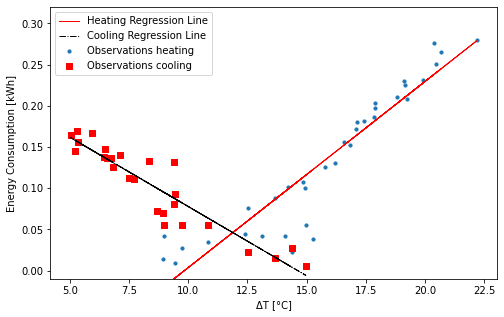

In [33]:
fig = plt.figure(figsize=(8,5))
plt.plot(heat_d.deltaT,results_h.predict(),'r', linewidth=1, label='Heating Regression Line')
plt.plot(cool_d.deltaT,results_c.predict(),'k', linestyle='-.', linewidth=1, label='Cooling Regression Line')
plt.scatter(heat_d.deltaT,heat_d.Heat, s=10, label='Observations heating', marker='o')
plt.scatter(cool_d.deltaT,cool_d.Cool, s=30, color='r', marker='s',label='Observations cooling')
plt.xlabel('\u0394T [\u00B0C]')
plt.ylabel('Energy Consumption [kWh]')
plt.ylim(-0.01,0.32)
plt.legend(loc='upper left')
plt.show()

In [34]:
rmse_c = mean_squared_error(cool_d.Cool.values, results_c.predict(), squared=False)
print('The RMSE for weekly resolution for Cooling Consumptions is: '+str(rmse_c)+' kWh')
results_c.summary()

The RMSE for weekly resolution for Cooling Consumptions is: 0.018255676003613823 kWh


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cool   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     156.5
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           5.24e-12
Time:                        09:50:15   Log-Likelihood:                 67.193
No. Observations:                  26   AIC:                            -130.4
Df Residuals:                      24   BIC:                            -127.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2457      0.012     20.433      0.000       0.221       0.271
deltaT        -0.0168      0.001    -12.512      0.000      -0.020      -0.014
==============================================================================
Omnibus:                        0.579   Durbin-Watson:                   1.324
Prob(Omnibus):                  0.749   Jarque-Bera (JB):                0.043
Skew:                           0.055   Prob(JB):                        0.979
Kurtosis:                       3.166   Cond. No.                         29.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
rmse_h = mean_squared_error(heat_d.Heat.values, results_h.predict(), squared=False)
print('The RMSE for weekly resolution for Heating Consumptions is: '+str(rmse_h)+' kWh')
results_h.summary()

The RMSE for weekly resolution for Heating Consumptions is: 0.03041755604676058 kWh


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Heat   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     222.5
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           3.17e-16
Time:                        09:50:15   Log-Likelihood:                 72.583
No. Observations:                  35   AIC:                            -141.2
Df Residuals:                      33   BIC:                            -138.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2221      0.024     -9.070      0.000      -0.272      -0.172
deltaT         0.0226      0.002     14.917      0.000       0.019       0.026
==============================================================================
Omnibus:                       11.672   Durbin-Watson:                   2.270
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.165
Skew:                          -1.159   Prob(JB):                      0.00376
Kurtosis:                       4.511   Cond. No.                         75.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multivariate Energy Signature: solar radiation as further regressor

# 10 minutes

In [36]:
df=pd.read_csv('my_data.csv',sep=',',decimal=',',index_col=0)

In [37]:
df.index=pd.to_datetime(df.index,unit='s')

In [38]:
df['deltaT']=df.T_in.astype(float)-df.T_ex.astype(float)
df['T_in']=df.T_in.astype(float)
df['T_ex']=df.T_ex.astype(float)
df['Heat']=df.Heat.astype(float)
df['Cool']=df.Cool.astype(float)
df['Solar']=df.Solar.astype(float)

Extract the cooling and heating dataframes

In [39]:
cool_d = df.where(df['Cool']!=0.0).dropna()
heat_d = df.where(df['Heat']!=0.0).dropna()

Fit the regression models

In [40]:
y_h = heat_d.Heat
y_c = cool_d.Cool
X_h = heat_d.loc[:, ['deltaT', 'Solar']]
X_c = cool_d.loc[:, ['deltaT', 'Solar']]
X_h = sm.add_constant(X_h)
X_c = sm.add_constant(X_c)

In [41]:
model_h = sm.OLS(y_h,X_h)
model_c = sm.OLS(y_c,X_c)

In [42]:
results_h = model_h.fit()
results_c = model_c.fit()

Plot the results

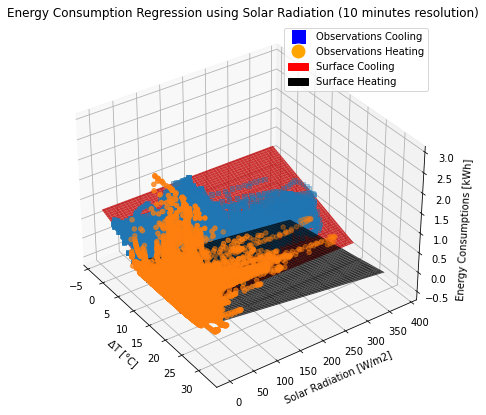

In [43]:
xx1c, xx2c = np.meshgrid(np.linspace(cool_d.deltaT.min(), cool_d.deltaT.max(), 100), 
                         np.linspace(cool_d.Solar.min(), cool_d.Solar.max(), 100))
Zc = results_c.params[0] + results_c.params[1] * xx1c + results_c.params[2] * xx2c

xx1h, xx2h = np.meshgrid(np.linspace(heat_d.deltaT.min(), heat_d.deltaT.max(), 100), 
                         np.linspace(heat_d.Solar.min(), heat_d.Solar.max(), 100))
Zh = results_h.params[0] + results_h.params[1] * xx1h + results_h.params[2] * xx2h

fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cool_d.deltaT, cool_d.Solar, cool_d.Cool, marker = 's', label='Observations Cooling')
ax.scatter(heat_d.deltaT, heat_d.Solar, heat_d.Heat, label='Observations Heating')
ax.plot_surface(xx1c, xx2c, Zc, color='r', alpha=0.8, linewidth=0)
ax.plot_surface(xx1h, xx2h, Zh, color='black', alpha=0.8, linewidth=0)

ax.set_xlabel('\u0394T [\u00B0C]')
ax.set_ylabel('Solar Radiation [W/m2]')
ax.set_zlabel('Energy Consumptions [kWh]')
ax.set_title('Energy Consumption Regression using Solar Radiation (10 minutes resolution)')
ax.view_init(elev=34, azim=-35)
# # rotate the axes and update
# for angle in range(0, 360):
#     ax.view_init(45, angle)
#     plt.draw()
#     plt.pause(.001)
scatter_cool = Line2D([0], [0], marker='s',color='white', label='Observations Cooling',
                      markerfacecolor='blue', markersize=15)
scatter_heat = Line2D([0], [0], marker='o',color='white', label='Observations Heating',
                      markerfacecolor='orange', markersize=15)
surf_cool = mpatches.Patch(color='red',label='Surface Cooling')
surf_heat = mpatches.Patch(color='black',label='Surface Heating')
ax.legend(handles=[scatter_cool,scatter_heat,surf_cool,surf_heat])
plt.show()

Compute RMSE and summary of results

In [44]:
rmse_c = mean_squared_error(cool_d.Cool.values, results_c.predict(), squared=False)
print('The RMSE for 10 minutes resolution for Cooling Consumptions is: '+str(rmse_c)+' kWh')
results_c.summary()

The RMSE for 10 minutes resolution for Cooling Consumptions is: 0.10467623246894477 kWh


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cool   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     8642.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        09:50:24   Log-Likelihood:                 6417.0
No. Observations:                7658   AIC:                        -1.283e+04
Df Residuals:                    7655   BIC:                        -1.281e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6545      0.003    214.825      0.000       0.649       0.660
deltaT        -0.0376      0.000   -131.438      0.000      -0.038      -0.037
Solar      -3.604e-05    1.3e-05     -2.779      0.005   -6.15e-05   -1.06e-05
==============================================================================
Omnibus:                      169.487   Durbin-Watson:                   0.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.470
Skew:                           0.175   Prob(JB):                     1.27e-66
Kurtosis:                       3.911   Cond. No.                         400.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
rmse_h = mean_squared_error(heat_d.Heat.values, results_h.predict(), squared=False)
print('The RMSE for 10 minutes resolution for Heating Consumptions is: '+str(rmse_h)+' kWh')
results_h.summary()

The RMSE for 10 minutes resolution for Heating Consumptions is: 0.36726393893237935 kWh


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Heat   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     804.3
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        09:50:25   Log-Likelihood:                -7045.5
No. Observations:               16885   AIC:                         1.410e+04
Df Residuals:                   16882   BIC:                         1.412e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0638      0.012     -5.522      0.000      -0.086      -0.041
deltaT         0.0199      0.001     33.309      0.000       0.019       0.021
Solar         -0.0014   7.02e-05    -20.452      0.000      -0.002      -0.001
==============================================================================
Omnibus:                    10168.755   Durbin-Watson:                   0.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           106441.778
Skew:                           2.783   Prob(JB):                         0.00
Kurtosis:                      13.969   Cond. No.                         179.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Hourly

In [46]:
df=df.resample('H').mean()
df=df.dropna()

Extract the cooling and heating dataframes

In [47]:
cool_d = df.where(df['Cool']!=0.0).dropna()
heat_d = df.where(df['Heat']!=0.0).dropna()

Fit the regression models

In [48]:
y_h = heat_d.Heat
y_c = cool_d.Cool
X_h = heat_d.loc[:, ['deltaT', 'Solar']]
X_c = cool_d.loc[:, ['deltaT', 'Solar']]
X_h = sm.add_constant(X_h)
X_c = sm.add_constant(X_c)

In [49]:
model_h = sm.OLS(y_h,X_h)
model_c = sm.OLS(y_c,X_c)

In [50]:
results_h = model_h.fit()
results_c = model_c.fit()

Plot the results

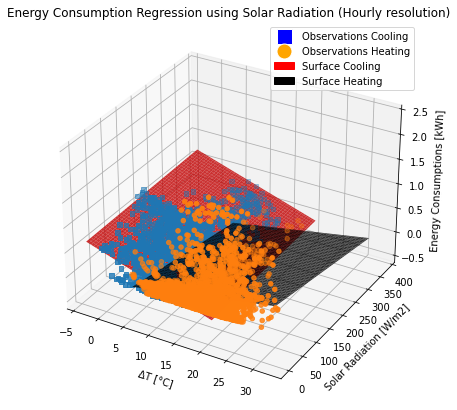

In [51]:
xx1c, xx2c = np.meshgrid(np.linspace(cool_d.deltaT.min(), cool_d.deltaT.max(), 100), 
                         np.linspace(cool_d.Solar.min(), cool_d.Solar.max(), 100))
Zc = results_c.params[0] + results_c.params[1] * xx1c + results_c.params[2] * xx2c

xx1h, xx2h = np.meshgrid(np.linspace(heat_d.deltaT.min(), heat_d.deltaT.max(), 100), 
                         np.linspace(heat_d.Solar.min(), heat_d.Solar.max(), 100))
Zh = results_h.params[0] + results_h.params[1] * xx1h + results_h.params[2] * xx2h

fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cool_d.deltaT, cool_d.Solar, cool_d.Cool, marker = 's', label='Observations Cooling')
ax.scatter(heat_d.deltaT, heat_d.Solar, heat_d.Heat, label='Observations Heating')
ax.plot_surface(xx1c, xx2c, Zc, color='r', alpha=0.8, linewidth=0)
ax.plot_surface(xx1h, xx2h, Zh, color='black', alpha=0.8, linewidth=0)
ax.set_xlabel('\u0394T [\u00B0C]')
ax.set_ylabel('Solar Radiation [W/m2]')
ax.set_zlabel('Energy Consumptions [kWh]')
ax.set_title('Energy Consumption Regression using Solar Radiation (Hourly resolution)')
# ax.view_init(elev=34, azim=-35)
# ax.view_init(elev=17, azim=-83)
scatter_cool = Line2D([0], [0], marker='s',color='white', label='Observations Cooling',
                      markerfacecolor='blue', markersize=15)
scatter_heat = Line2D([0], [0], marker='o',color='white', label='Observations Heating',
                      markerfacecolor='orange', markersize=15)
surf_cool = mpatches.Patch(color='red',label='Surface Cooling')
surf_heat = mpatches.Patch(color='black',label='Surface Heating')
ax.legend(handles=[scatter_cool,scatter_heat,surf_cool,surf_heat])
plt.show()

Compute RMSE and summary of results

In [52]:
rmse_c = mean_squared_error(cool_d.Cool.values, results_c.predict(), squared=False)
print('The RMSE for hourly resolution for Cooling Consumptions is: '+str(rmse_c)+' kWh')
results_c.summary()

The RMSE for hourly resolution for Cooling Consumptions is: 0.14386712714695096 kWh


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cool   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     684.6
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          3.27e-209
Time:                        09:50:29   Log-Likelihood:                 744.01
No. Observations:                1431   AIC:                            -1482.
Df Residuals:                    1428   BIC:                            -1466.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5584      0.010     58.242      0.000       0.540       0.577
deltaT        -0.0330      0.001    -36.802      0.000      -0.035      -0.031
Solar          0.0002   4.19e-05      3.657      0.000     7.1e-05       0.000
==============================================================================
Omnibus:                      132.312   Durbin-Watson:                   0.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.500
Skew:                          -0.712   Prob(JB):                     7.09e-42
Kurtosis:                       4.072   Cond. No.                         383.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
rmse_h = mean_squared_error(heat_d.Heat.values, results_h.predict(), squared=False)
print('The RMSE for hourly resolution for Heating Consumptions is: '+str(rmse_h)+' kWh')
results_h.summary()

The RMSE for hourly resolution for Heating Consumptions is: 0.34375898729933924 kWh


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Heat   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     143.7
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           2.77e-60
Time:                        09:50:30   Log-Likelihood:                -1039.0
No. Observations:                2959   AIC:                             2084.
Df Residuals:                    2956   BIC:                             2102.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0544      0.026     -2.100      0.036      -0.105      -0.004
deltaT         0.0187      0.001     13.895      0.000       0.016       0.021
Solar         -0.0014      0.000     -8.875      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1555.122   Durbin-Watson:                   0.484
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10774.898
Skew:                           2.448   Prob(JB):                         0.00
Kurtosis:                      10.964   Cond. No.                         182.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Daily

In [54]:
df=df.resample('D').mean()
df=df.dropna()

Extract the cooling and heating dataframes

In [55]:
cool_d = df.where(df['Cool']!=0.0).dropna()
heat_d = df.where(df['Heat']!=0.0).dropna()

Fit the regression models

In [56]:
y_h = heat_d.Heat
y_c = cool_d.Cool
X_h = heat_d.loc[:, ['deltaT', 'Solar']]
X_c = cool_d.loc[:, ['deltaT', 'Solar']]
X_h = sm.add_constant(X_h)
X_c = sm.add_constant(X_c)

In [57]:
model_h = sm.OLS(y_h,X_h)
model_c = sm.OLS(y_c,X_c)

In [58]:
results_h = model_h.fit()
results_c = model_c.fit()

Plot the results

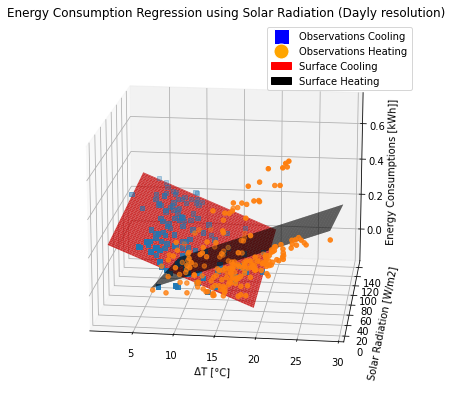

In [59]:
xx1c, xx2c = np.meshgrid(np.linspace(cool_d.deltaT.min(), cool_d.deltaT.max(), 100), 
                         np.linspace(cool_d.Solar.min(), cool_d.Solar.max(), 100))
Zc = results_c.params[0] + results_c.params[1] * xx1c + results_c.params[2] * xx2c

xx1h, xx2h = np.meshgrid(np.linspace(heat_d.deltaT.min(), heat_d.deltaT.max(), 100), 
                         np.linspace(heat_d.Solar.min(), heat_d.Solar.max(), 100))
Zh = results_h.params[0] + results_h.params[1] * xx1h + results_h.params[2] * xx2h

fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cool_d.deltaT, cool_d.Solar, cool_d.Cool, marker = 's')
ax.scatter(heat_d.deltaT, heat_d.Solar, heat_d.Heat)
ax.plot_surface(xx1c, xx2c, Zc, color='r', alpha=0.8, linewidth=0)
ax.plot_surface(xx1h, xx2h, Zh, color='black', alpha=0.8, linewidth=0)
ax.set_xlabel('\u0394T [\u00B0C]')
ax.set_ylabel('Solar Radiation [W/m2]')
ax.set_zlabel('Energy Consumptions [kWh]]')
ax.set_title('Energy Consumption Regression using Solar Radiation (Dayly resolution)')
ax.view_init(elev=17, azim=-83)
# # rotate the axes and update
# for angle in range(0, 360):
#     ax.view_init(45, angle)
#     plt.draw()
#     plt.pause(.001)
scatter_cool = Line2D([0], [0], marker='s',color='white', label='Observations Cooling',
                      markerfacecolor='blue', markersize=15)
scatter_heat = Line2D([0], [0], marker='o',color='white', label='Observations Heating',
                      markerfacecolor='orange', markersize=15)
surf_cool = mpatches.Patch(color='red',label='Surface Cooling')
surf_heat = mpatches.Patch(color='black',label='Surface Heating')
ax.legend(handles=[scatter_cool,scatter_heat,surf_cool,surf_heat])
plt.show()

Compute RMSE and summary of results

In [60]:
rmse_c = mean_squared_error(cool_d.Cool.values, results_c.predict(), squared=False)
print('The RMSE for dayly resolution for Cooling Consumptions is: '+str(rmse_c)+' kWh')
results_c.summary()

The RMSE for dayly resolution for Cooling Consumptions is: 0.03762486778921291 kWh


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cool   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     196.0
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           2.92e-39
Time:                        09:50:33   Log-Likelihood:                 238.23
No. Observations:                 128   AIC:                            -470.5
Df Residuals:                     125   BIC:                            -461.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2699      0.012     21.677      0.000       0.245       0.295
deltaT        -0.0169      0.001    -16.899      0.000      -0.019      -0.015
Solar          0.0004   8.35e-05      5.378      0.000       0.000       0.001
==============================================================================
Omnibus:                       20.280   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.285
Skew:                          -1.015   Prob(JB):                     5.33e-06
Kurtosis:                       3.659   Cond. No.                         297.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
rmse_h = mean_squared_error(heat_d.Heat.values, results_h.predict(), squared=False)
print('The RMSE for dayly resolution for Heating Consumptions is: '+str(rmse_h)+' kWh')
results_h.summary()

The RMSE for dayly resolution for Heating Consumptions is: 0.13155789929631237 kWh


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Heat   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     38.83
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           4.90e-15
Time:                        09:50:33   Log-Likelihood:                 127.36
No. Observations:                 209   AIC:                            -248.7
Df Residuals:                     206   BIC:                            -238.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0803      0.043     -1.881      0.061      -0.164       0.004
deltaT         0.0155      0.002      6.733      0.000       0.011       0.020
Solar         -0.0012      0.000     -3.162      0.002      -0.002      -0.000
==============================================================================
Omnibus:                       56.695   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.655
Skew:                           1.459   Prob(JB):                     1.03e-21
Kurtosis:                       4.607   Cond. No.                         151.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Weekly

In [62]:
df=df.resample('W').mean()
df=df.dropna()

Extract the cooling and heating dataframes

In [63]:
cool_d = df.where(df['Cool']!=0.0).dropna()
heat_d = df.where(df['Heat']!=0.0).dropna()
heat_d.drop(heat_d.index[0], inplace=True)
heat_d.drop(heat_d.index[-1],inplace=True)

Fit the regression models

In [64]:
y_h = heat_d.Heat
y_c = cool_d.Cool
X_h = heat_d.loc[:, ['deltaT', 'Solar']]
X_c = cool_d.loc[:, ['deltaT', 'Solar']]
X_h = sm.add_constant(X_h)
X_c = sm.add_constant(X_c)

In [65]:
model_h = sm.OLS(y_h,X_h)
model_c = sm.OLS(y_c,X_c)

In [66]:
results_h = model_h.fit()
results_c = model_c.fit()

Plot the results

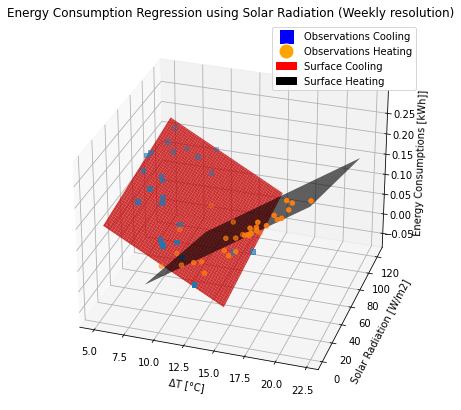

In [67]:
xx1c, xx2c = np.meshgrid(np.linspace(cool_d.deltaT.min(), cool_d.deltaT.max(), 100), 
                         np.linspace(cool_d.Solar.min(), cool_d.Solar.max(), 100))
Zc = results_c.params[0] + results_c.params[1] * xx1c + results_c.params[2] * xx2c

xx1h, xx2h = np.meshgrid(np.linspace(heat_d.deltaT.min(), heat_d.deltaT.max(), 100), 
                         np.linspace(heat_d.Solar.min(), heat_d.Solar.max(), 100))
Zh = results_h.params[0] + results_h.params[1] * xx1h + results_h.params[2] * xx2h

fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cool_d.deltaT, cool_d.Solar, cool_d.Cool, marker = 's',label='Observations Cooling')
ax.scatter(heat_d.deltaT, heat_d.Solar, heat_d.Heat, label='Observations Heating')
ax.plot_surface(xx1c, xx2c, Zc, color='r', alpha=0.8, linewidth=0)
ax.plot_surface(xx1h, xx2h, Zh, color='black', alpha=0.8, linewidth=0)

ax.set_xlabel('\u0394T [\u00B0C]')
ax.set_ylabel('Solar Radiation [W/m2]')
ax.set_zlabel('Energy Consumptions [kWh]]')
ax.set_title('Energy Consumption Regression using Solar Radiation (Weekly resolution)')
#ax.view_init(elev=18, azim=-77)
ax.view_init(elev=29, azim=-72)

scatter_cool = Line2D([0], [0], marker='s',color='white', label='Observations Cooling',
                      markerfacecolor='blue', markersize=15)
scatter_heat = Line2D([0], [0], marker='o',color='white', label='Observations Heating',
                      markerfacecolor='orange', markersize=15)
surf_cool = mpatches.Patch(color='red',label='Surface Cooling')
surf_heat = mpatches.Patch(color='black',label='Surface Heating')
ax.legend(handles=[scatter_cool,scatter_heat,surf_cool,surf_heat])
plt.show()


Compute RMSE and summary of results

In [68]:
rmse_c = mean_squared_error(cool_d.Cool.values, results_c.predict(), squared=False)
print('The RMSE for weekly resolution for Cooling Consumptions is: '+str(rmse_c)+' kWh')
results_c.summary()

The RMSE for weekly resolution for Cooling Consumptions is: 0.012423529474277484 kWh


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cool   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     175.3
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           1.19e-14
Time:                        09:50:37   Log-Likelihood:                 77.200
No. Observations:                  26   AIC:                            -148.4
Df Residuals:                      23   BIC:                            -144.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1991      0.012     16.181      0.000       0.174       0.225
deltaT        -0.0149      0.001    -14.945      0.000      -0.017      -0.013
Solar          0.0005   8.94e-05      5.164      0.000       0.000       0.001
==============================================================================
Omnibus:                        6.564   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                4.562
Skew:                          -0.911   Prob(JB):                        0.102
Kurtosis:                       3.945   Cond. No.                         353.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
rmse_h = mean_squared_error(heat_d.Heat.values, results_h.predict(), squared=False)
print('The RMSE for weekly resolution for Heating Consumptions is: '+str(rmse_h)+' kWh')
results_h.summary()

The RMSE for weekly resolution for Heating Consumptions is: 0.02557350103798011 kWh


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Heat   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     152.7
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           8.88e-17
Time:                        09:50:37   Log-Likelihood:                 76.407
No. Observations:                  34   AIC:                            -146.8
Df Residuals:                      31   BIC:                            -142.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1388      0.031     -4.540      0.000      -0.201      -0.076
deltaT         0.0185      0.002     10.908      0.000       0.015       0.022
Solar         -0.0008      0.000     -3.679      0.001      -0.001      -0.000
==============================================================================
Omnibus:                        1.509   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.470   Jarque-Bera (JB):                0.659
Skew:                           0.293   Prob(JB):                        0.719
Kurtosis:                       3.349   Cond. No.                         245.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""